In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
np.random.seed(123)

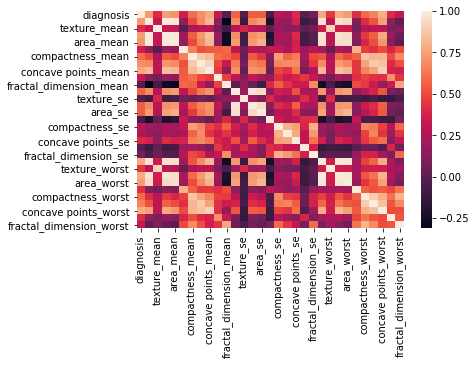

In [2]:
data = pd.read_csv('data.csv')
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
corr = data.corr()
sns.heatmap(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

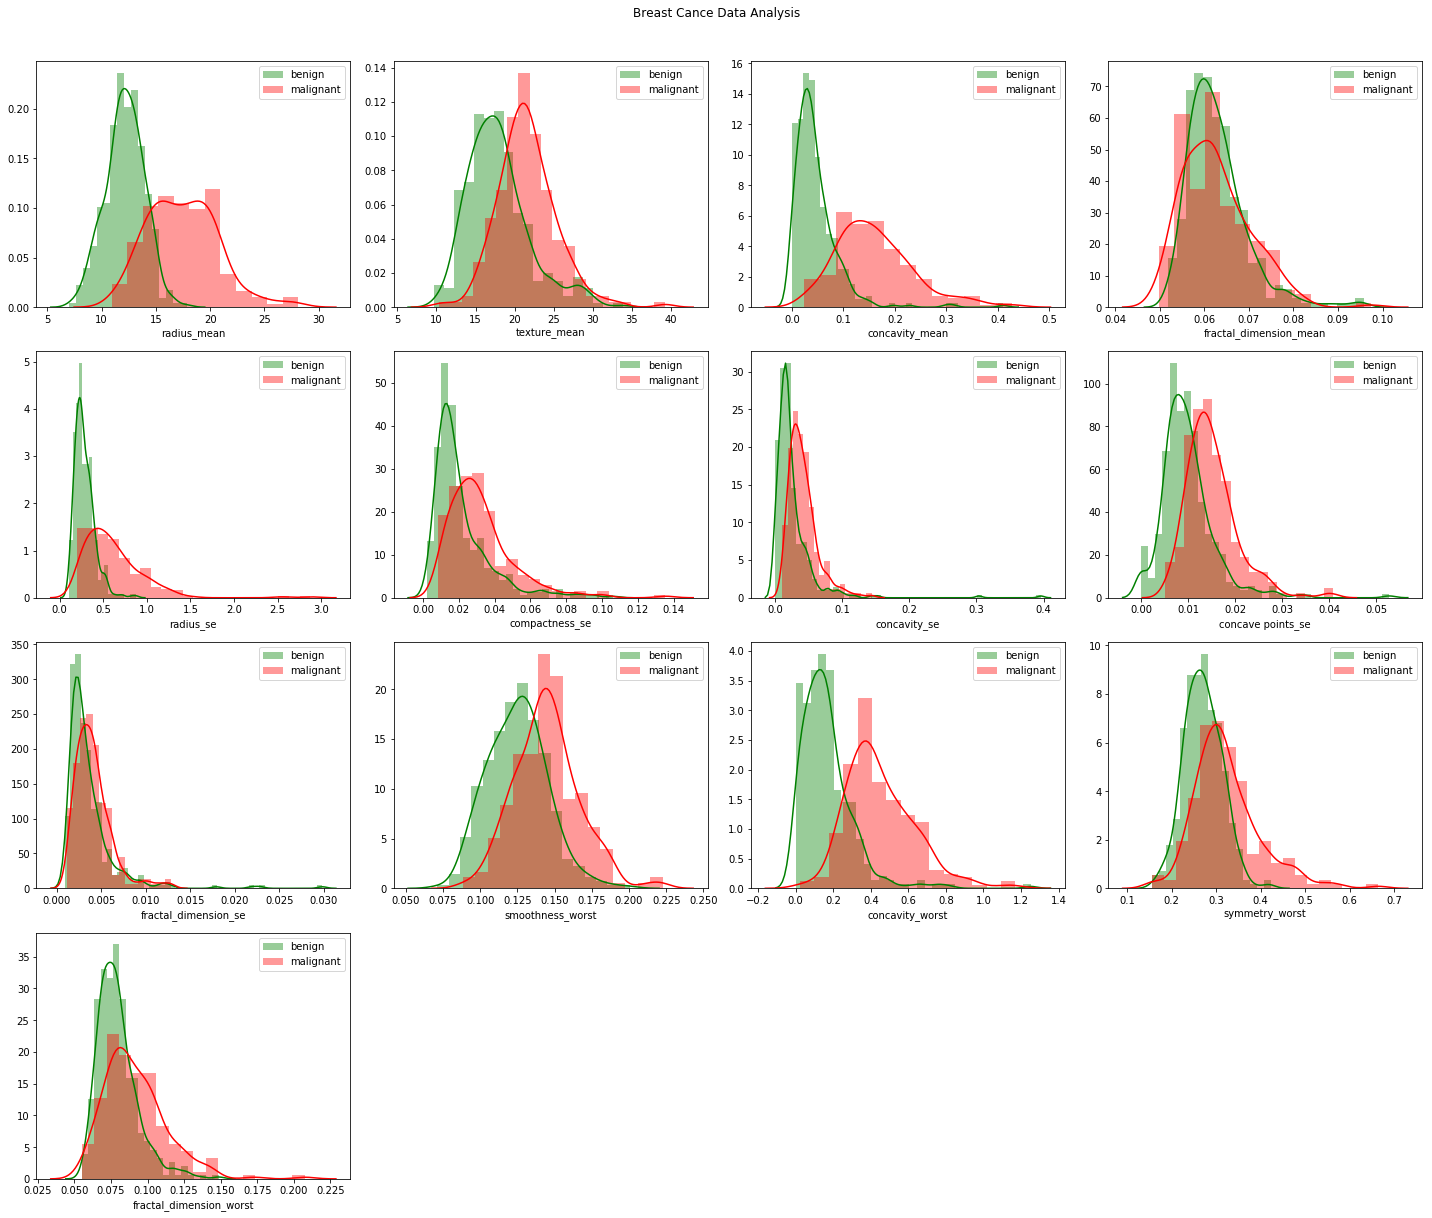

In [3]:
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4,j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

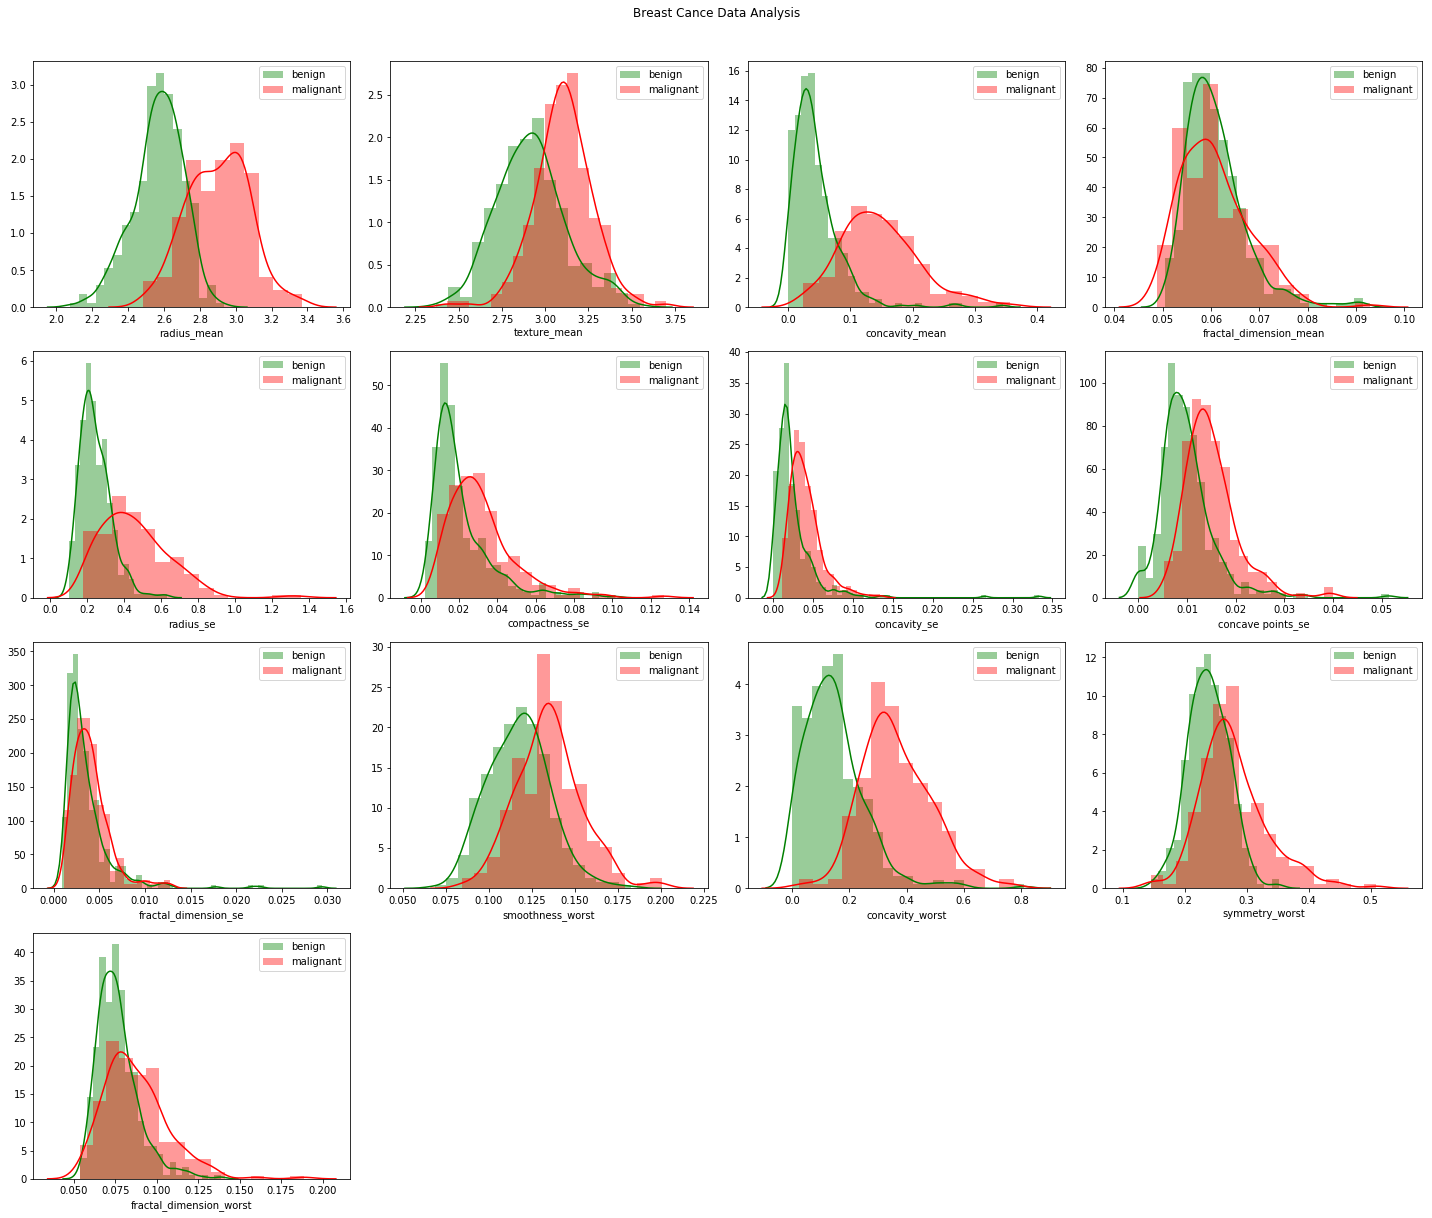

In [4]:
data=np.log(1+data)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4,j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred1=clf.predict(x_test)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
cm = confusion_matrix(y_test, prediction)
cm1= confusion_matrix(y_test,pred)
cm2=confusion_matrix(y_test,pred1)
sum = 0
sum1=0
sum2=0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    sum1+=cm1[i][i]
    sum2+=cm2[i][i]
    
accuracy = sum/x_test.shape[0]
acc=sum1/x_test.shape[0]
acc1=sum2/x_test.shape[0]
print("SVC Accuracy:", accuracy)

SVC Accuracy: 0.9210526315789473


In [9]:
print("Logistic Regression Accuracy: ", acc)

Logistic Regression Accuracy:  0.8771929824561403


In [10]:
print("Decision Tree Accuracy: ",acc1)

Decision Tree Accuracy:  0.9385964912280702


# Checking if data is balanced or imbalanced

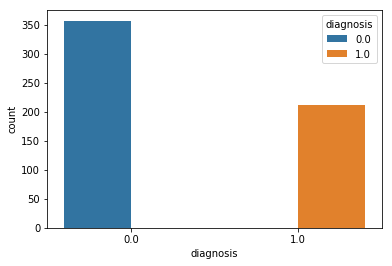

In [50]:
sns.countplot(x="diagnosis",data=result,hue="diagnosis")

In [56]:
result["diagnosis"].value_counts(normalize=True)

0.0    0.627417
1.0    0.372583
Name: diagnosis, dtype: float64

Hence the given data is little bit imbalanced. Now we can't rely on accuracy for an error rate. Best way to find true error rate are Precision-recall score and F1 score

# Precision Score

In [81]:
from sklearn.metrics import precision_score
print("SVM", precision_score(y_test,prediction))

SVM 1.0


In [82]:
print("Logistic", precision_score(y_test,pred1))

Logistic 0.9534883720930233


In [83]:
print("Decision Tree", precision_score(y_test,pred))

Decision Tree 0.9


In [89]:
from sklearn.ensemble import RandomForestClassifier
raf=RandomForestClassifier(n_estimators=5000)
raf.fit(x_train,y_train)
raf_pred=raf.predict(x_test)
print("Random Forest",precision_score(y_test,raf_pred))

Random Forest 0.9767441860465116


In [85]:
import xgboost as xgb

In [88]:
xgc=xgb.XGBClassifier(n_estimators=800)
xgc.fit(x_train,y_train)
xgc_pred=xgc.predict(x_test)
print("XGboost",precision_score(y_test,xgc_pred))

XGboost 0.9555555555555556


# Recall Score

In [91]:
from sklearn.metrics import recall_score
print("SVM", recall_score(y_test,prediction))

SVM 0.8043478260869565


In [102]:
print("Logistic Regression", recall_score(y_test,pred1))

Logistic Regression 0.8913043478260869


In [101]:
print("Decision Tree", recall_score(y_test,pred))

Decision Tree 0.782608695652174


In [100]:
print("Random Forest", recall_score(y_test,raf_pred))

Random Forest 0.9130434782608695


In [99]:
print("xgb", recall_score(y_test,xgc_pred))

xgb 0.9347826086956522


# F1-Score

In [103]:
from sklearn.metrics import f1_score
print("SVM", f1_score(y_test,prediction))

SVM 0.891566265060241


In [108]:
print("Logistic Regression", f1_score(y_test,pred1))

Logistic Regression 0.9213483146067417


In [109]:
print("Decision Tree", f1_score(y_test,pred))

Decision Tree 0.8372093023255814


In [110]:
print("Random Forest", f1_score(y_test,raf_pred))

Random Forest 0.9438202247191011


In [111]:
print("xgb", f1_score(y_test,xgc_pred))

xgb 0.945054945054945


# Observa